In [18]:
import numpy as np
import pandas as pd
import datetime
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt, numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import ListedColormap
from sklearn import metrics
import warnings
import sys
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np
if not sys.warnoptions:
    warnings.simplefilter("ignore")


Read Data

In [19]:
data = pd.read_csv("/Users/shats/Documents/VSCode/everything/GB 656/HW4/HW4_data.csv", sep="\t")
print("Number of datapoints:", len(data))
data.head()

Number of datapoints: 2240


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


Data Description

1. Customor Information: <br>
<br>
ID: Customer's unique identifier <br>
Year_Birth: Customer's birth year <br>
Education: Customer's education level <br>
Marital_Status: Customer's marital status <br>
Income: Customer's yearly household income <br>
Kidhome: Number of children in customer's household <br>
Teenhome: Number of teenagers in customer's household <br>
Dt_Customer: Date of customer's enrollment with the company <br>
Recency: Number of days since customer's last purchase <br>
Complain: 1 if the customer complained in the last 2 years, 0 otherwise <br>

2. Product Information <br>
<br>
MntWines: Amount spent on wine in last 2 years <br>
MntFruits: Amount spent on fruits in last 2 years <br>
MntMeatProducts: Amount spent on meat in last 2 years <br>
MntFishProducts: Amount spent on fish in last 2 years <br>
MntSweetProducts: Amount spent on sweets in last 2 years <br>
MntGoldProds: Amount spent on gold in last 2 years

3. Promotion Information: <br>
<br>
NumDealsPurchases: Number of purchases made with a discount <br>
AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise <br>
AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise <br>
AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise <br>
AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise <br>
AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise <br>
Response: 1 if customer accepted the offer in the last campaign, 0 otherwise

4. Channel Information: <br>
<br>
NumWebPurchases: Number of purchases made through the company’s website <br>
NumCatalogPurchases: Number of purchases made using a catalogue <br>
NumStorePurchases: Number of purchases made directly in stores <br>
NumWebVisitsMonth: Number of visits to company’s website in the last month

A quick check on the dataset

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

Observations: <br>
1. missing values found in income
2. Dt_Customer that indicates the date a customer joined the database is not parsed as DateTime
3. There are some categorical features in our data, will need to encode them.

In [21]:
# Remove missing values
# since there are only a very small portion of data that is missing, we can simply remove them, but you are welcome to use other treatments.
data = data.dropna()
print("The total number of data points after removing the rows with missing values are:", len(data))

The total number of data points after removing the rows with missing values are: 2216


In [22]:
# Convert Dt_Customer to DateTime
data["Dt_Customer"] = pd.to_datetime(data["Dt_Customer"], dayfirst=True)
dates = []
for i in data["Dt_Customer"]:
    i = i.date()
    dates.append(i)  
#Dates of the newest and oldest recorded customer
print("The newest customer's enrolment date in therecords:",max(dates))
print("The oldest customer's enrolment date in the records:",min(dates))

# Store the new data in "Customer_For"
days = []
d1 = max(dates) #taking it to be the newest customer
for i in dates:
    delta = d1 - i
    days.append(delta)
data["Customer_For"] = days
data["Customer_For"] = pd.to_numeric(data["Customer_For"], errors="coerce")

The newest customer's enrolment date in therecords: 2014-06-29
The oldest customer's enrolment date in the records: 2012-07-30


In [23]:
# A quick check on the distribution of levels in categorical variables
print("Total categories in the feature Marital_Status:\n", data["Marital_Status"].value_counts(), "\n")
print("Total categories in the feature Education:\n", data["Education"].value_counts())

Total categories in the feature Marital_Status:
 Marital_Status
Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64 

Total categories in the feature Education:
 Education
Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: count, dtype: int64


### Examine the data and construct relevant features

In [24]:
# One-hot encode categorical variables
data = pd.get_dummies(data, columns=['Education', 'Marital_Status'], drop_first=True)

# Customer Demographics
# Calculate Age
current_year = 2024  # Replace with the current year
data['Age'] = current_year - data['Year_Birth']

# Calculate Family Size
data['Family_Size'] = data['Kidhome'] + data['Teenhome']

# Total Spending: Sum of all spending columns
spending_columns = ['MntWines', 'MntFruits', 'MntMeatProducts', 
                    'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
data['Total_Spending'] = data[spending_columns].sum(axis=1)

# Total Purchases: Sum of all purchase channels
purchase_columns = ['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']
data['Total_Purchases'] = data[purchase_columns].sum(axis=1)

# Average Purchase Value
data['Avg_Purchase_Value'] = np.where(
    data['Total_Purchases'] > 0,
    data['Total_Spending'] / data['Total_Purchases'],
    0  # Handle division by zero
)

# Total Campaign Acceptance: Sum of all acceptance columns
campaign_columns = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']
data['Total_Campaign_Acceptance'] = data[campaign_columns].sum(axis=1)


# Calculate percentage of purchases per channel
for channel in ['Web', 'Catalog', 'Store']:
    column = f'Num{channel}Purchases'
    data[f'{channel}_Purchase_Percent'] = np.where(
        data['Total_Purchases'] > 0,
        data[column] / data['Total_Purchases'],
        0
    )

# Calculate percentage of spending per product category
for category in ['Wines', 'Fruits', 'MeatProducts', 'FishProducts', 'SweetProducts', 'GoldProds']:
    column = f'Mnt{category}'
    data[f'{category}_Spending_Percent'] = np.where(
        data['Total_Spending'] > 0,
        data[column] / data['Total_Spending'],
        0
    )

data.head()

,ID,Year_Birth,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,Total_Campaign_Acceptance,Web_Purchase_Percent,Catalog_Purchase_Percent,Store_Purchase_Percent,Wines_Spending_Percent,Fruits_Spending_Percent,MeatProducts_Spending_Percent,FishProducts_Spending_Percent,SweetProducts_Spending_Percent,GoldProds_Spending_Percent
0,5524,1957,58138.0,0,0,2012-09-04,58,635,88,546,...,0,0.363636,0.454545,0.181818,0.392703,0.054422,0.337662,0.106370,0.054422,0.054422
1,2174,1954,46344.0,1,1,2014-03-08,38,11,1,6,...,0,0.250000,0.250000,0.500000,0.407407,0.037037,0.222222,0.074074,0.037037,0.222222
2,4141,1965,71613.0,0,0,2013-08-21,26,426,49,127,...,0,0.400000,0.100000,0.500000,0.548969,0.063144,0.163660,0.143041,0.027062,0.054124
3,6182,1984,26646.0,1,0,2014-02-10,26,11,4,20,...,0,0.333333,0.000000,0.666667,0.207547,0.075472,0.377358,0.188679,0.056604,0.094340
4,5324,1981,58293.0,1,0,2014-01-19,94,173,43,118,...,0,0.357143,0.214286,0.428571,0.409953,0.101896,0.279621,0.109005,0.063981,0.035545


### Reduce the dimensionality of the features through principal component analysis, making sure to justify the number of principal components used


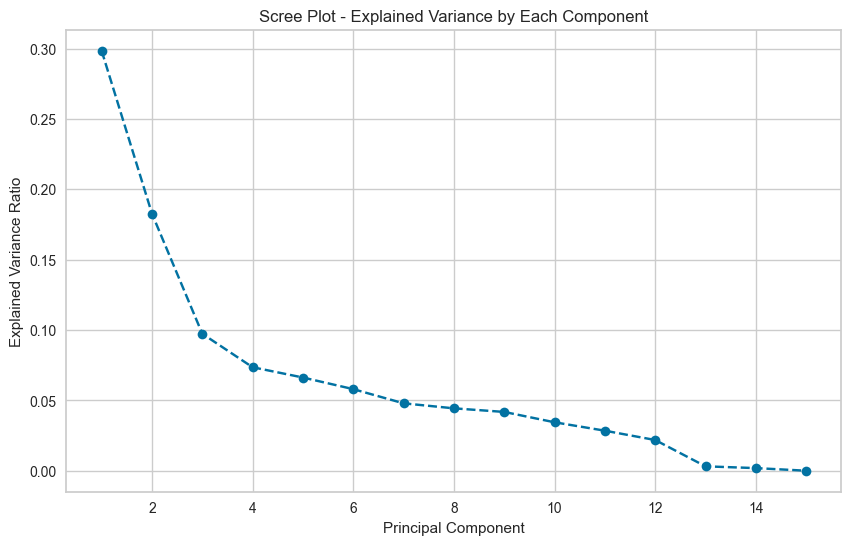

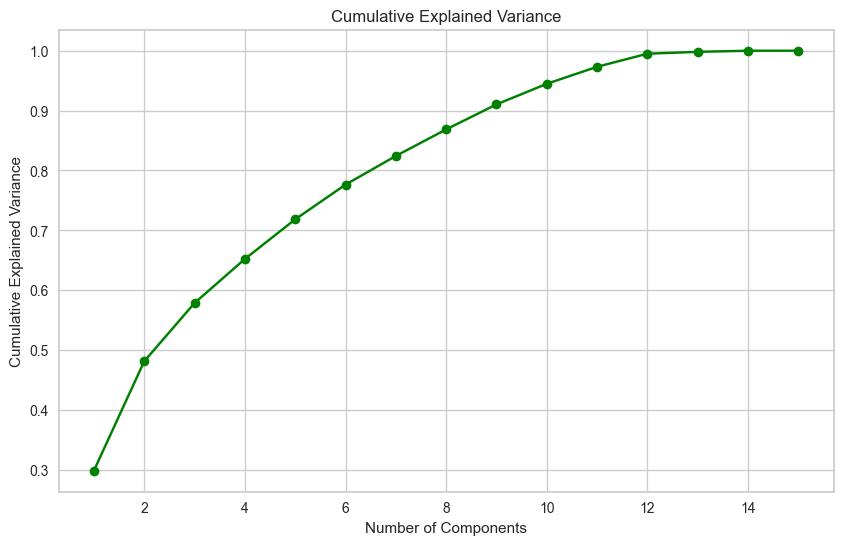

Optimal number of components: 7


In [25]:
# Using numerical features for PCA
numerical_features = ['Age', 'Family_Size', 'Total_Spending', 'Avg_Purchase_Value', 
                      'Total_Purchases', 'Total_Campaign_Acceptance'] + [col for col in data.columns if 'Purchase_Percent' in col or 'Spending_Percent' in col]

# Extracting the relevant columns
X = data[numerical_features]

# Standardize the features (scaling)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Determine the optimal number of components (Explained Variance Ratio)
explained_variance_ratio = pca.explained_variance_ratio_

# Create a Scree Plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', linestyle='--')
plt.title('Scree Plot - Explained Variance by Each Component')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.grid(True)
plt.show()

# Cumulative Explained Variance
cumulative_variance = np.cumsum(explained_variance_ratio)
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', color='green')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

optimal_components = np.argmax(cumulative_variance >= 0.80) + 1  # Choose components that explain at least 80% of variance
print(f"Optimal number of components: {optimal_components}")


### Create clusters based on the principal components (not the original features), justifying how many clusters you create; do not use the response to the campaign for clustering


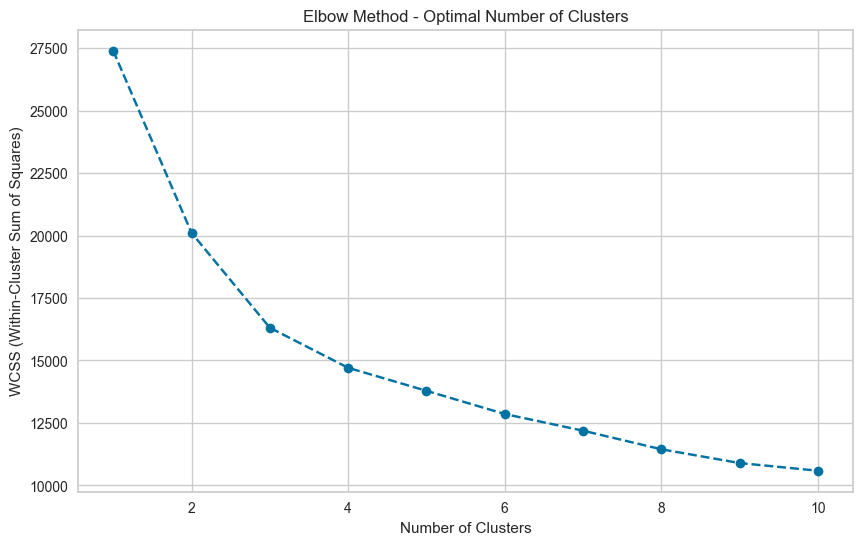

Cluster_Labels
3    589
2    588
1    576
0    463
Name: count, dtype: int64
Cluster_Labels
3    589
2    588
1    576
0    463
Name: count, dtype: int64


In [26]:
# Use the first 7 PCA components
X_pca_reduced = X_pca[:, :7]  

# Determine the optimal number of clusters using the Elbow Method
wcss = []  # Within-cluster sum of squares
k_values = range(1, 11)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_pca_reduced)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method
plt.figure(figsize=(10, 6))
plt.plot(k_values, wcss, marker='o', linestyle='--')
plt.title('Elbow Method - Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.grid(True)
plt.show()

# Perform clustering with the chosen number of clusters
optimal_k = 4  # Replace with the elbow point from the plot
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
data['Cluster_Labels'] = kmeans.fit_predict(X_pca_reduced)

# Analyze the clusters
print(data['Cluster_Labels'].value_counts())


# Perform clustering with the chosen number of clusters
optimal_k = 4  # elbow point from plot below(point where the curve starts to flatten)
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
data['Cluster_Labels'] = kmeans.fit_predict(X_pca_reduced)

# Analyze the clusters
print(data['Cluster_Labels'].value_counts())



### Examine how the clusters differ in their purchase behavior and response to the campaign. Also, examine how the different customer clusters react to discounts.


In [27]:
# Group by clusters and calculate cluster-wise statistics
cluster_summary = data.groupby('Cluster_Labels').agg({
    'Age': ['mean', 'median'],
    'Family_Size': ['mean', 'median'],
    'Total_Spending': ['mean', 'median'],
    'Avg_Purchase_Value': ['mean', 'median'],
    'Total_Campaign_Acceptance': ['mean', 'median'],
    'Web_Purchase_Percent': 'mean',
    'Store_Purchase_Percent': 'mean',
    'Catalog_Purchase_Percent': 'mean',
    'Wines_Spending_Percent': 'mean',
    'MeatProducts_Spending_Percent': 'mean',
    'FishProducts_Spending_Percent': 'mean',
    'Fruits_Spending_Percent': 'mean',
    'SweetProducts_Spending_Percent': 'mean',
    'GoldProds_Spending_Percent': 'mean'
}).reset_index()

# Flatten column names for readability
cluster_summary.columns = ['_'.join(col).strip() if col[1] else col[0] for col in cluster_summary.columns]

# Display the summary for each cluster
print(cluster_summary)

# Interpret the clusters
for cluster_id in cluster_summary['Cluster_Labels']:
    print(f"\nCluster {cluster_id} Insights:")
    cluster_data = cluster_summary[cluster_summary['Cluster_Labels'] == cluster_id]
    print(cluster_data.T)  # Transpose for easier reading

   Cluster_Labels   Age_mean  Age_median  Family_Size_mean  \
0               0  49.058315        47.0          0.829374   
1               1  55.895833        55.0          0.241319   
2               2  59.761905        59.0          1.164966   
3               3  54.716469        53.0          1.512733   

   Family_Size_median  Total_Spending_mean  Total_Spending_median  \
0                 1.0           163.967603                   70.0   
1                 0.0          1391.215278                 1373.0   
2                 1.0           682.704082                  631.0   
3                 1.0           113.059423                   63.0   

   Avg_Purchase_Value_mean  Avg_Purchase_Value_median  \
0                17.176470                  13.000000   
1                74.807799                  71.452273   
2                39.520559                  36.026316   
3                14.803271                  12.200000   

   Total_Campaign_Acceptance_mean  Total_Campaign_Accepta

In [28]:
# Display key insights for each cluster
for cluster_id in cluster_summary['Cluster_Labels']:
    print(f"\nCluster {cluster_id} Summary:")
    cluster_data = cluster_summary[cluster_summary['Cluster_Labels'] == cluster_id]
    print(cluster_data.T)  

# Highlighting specific clusters
print("\nCluster 0 Analysis:")
print(f"Average Age: {cluster_summary.loc[0, 'Age_mean']}")
print(f"Average Spending: {cluster_summary.loc[0, 'Total_Spending_mean']}")
print(f"Web Purchases Preference: {cluster_summary.loc[0, 'Web_Purchase_Percent_mean']}")



Cluster 0 Summary:
                                              0
Cluster_Labels                         0.000000
Age_mean                              49.058315
Age_median                            47.000000
Family_Size_mean                       0.829374
Family_Size_median                     1.000000
Total_Spending_mean                  163.967603
Total_Spending_median                 70.000000
Avg_Purchase_Value_mean               17.176470
Avg_Purchase_Value_median             13.000000
Total_Campaign_Acceptance_mean         0.060475
Total_Campaign_Acceptance_median       0.000000
Web_Purchase_Percent_mean              0.334382
Store_Purchase_Percent_mean            0.563752
Catalog_Purchase_Percent_mean          0.091067
Wines_Spending_Percent_mean            0.165527
MeatProducts_Spending_Percent_mean     0.228843
FishProducts_Spending_Percent_mean     0.154449
Fruits_Spending_Percent_mean           0.112227
SweetProducts_Spending_Percent_mean    0.110051
GoldProds_Spending_P

### Suppose you had limited the campaign to specific clusters. Can you calculate the total profit for each cluster, the profit per customer in that cluster (as a measure of profitability), and the percentage of your customer base represented by that cluster (as a measure of reach)?


In [29]:
# Campaign Profitability Analysis

# Constants
revenue_per_sale = 3.67
cost_per_customer = 3.00

# Add profitability metrics to cluster_summary
cluster_profitability = cluster_summary.copy()

# Number of customers in each cluster
total_customers = data.shape[0]
cluster_profitability['Cluster_Size'] = data['Cluster_Labels'].value_counts().sort_index().values

# Calculate revenue for each cluster
cluster_profitability['Total_Revenue'] = (
    cluster_profitability['Total_Campaign_Acceptance_mean'] * cluster_profitability['Cluster_Size'] * revenue_per_sale
)

# Calculate cost for each cluster
cluster_profitability['Total_Cost'] = cluster_profitability['Cluster_Size'] * cost_per_customer

# Calculate profit for each cluster
cluster_profitability['Total_Profit'] = cluster_profitability['Total_Revenue'] - cluster_profitability['Total_Cost']

# Calculate profit per customer
cluster_profitability['Profit_Per_Customer'] = cluster_profitability['Total_Profit'] / cluster_profitability['Cluster_Size']

# Calculate percentage of total customer base
cluster_profitability['Percent_of_Customer_Base'] = (cluster_profitability['Cluster_Size'] / total_customers) * 100

# Display the profitability table
# Save the results for external inspection if needed
cluster_profitability.to_csv("cluster_profitability_analysis.csv", index=False)

# Show profitability insights
print("\nCluster Profitability Summary:")
print(cluster_profitability[['Cluster_Labels', 'Total_Profit', 'Profit_Per_Customer', 'Percent_of_Customer_Base']])



Cluster Profitability Summary:
   Cluster_Labels  Total_Profit  Profit_Per_Customer  Percent_of_Customer_Base
0               0      -1286.24            -2.778056                 20.893502
1               1       -186.60            -0.323958                 25.992780
2               2      -1114.41            -1.895255                 26.534296
3               3      -1634.88            -2.775688                 26.579422


### Create a predictive model that predicts the total purchases made by a customer for a campaign like this. Create a decision rule based on the predictive model that would select only specific customers to be targeted by the campaign. Calculate the total profit based on your decision rule in the test sample, the profit per invited customer, and the percentage of customers invited. Compare these statistics to a selection based on clustering from 5).


In [30]:
### Prepare Data for Modeling
features = ['Age', 'Family_Size', 'Total_Spending', 'Avg_Purchase_Value', 
            'Total_Campaign_Acceptance', 'Web_Purchase_Percent', 
            'Store_Purchase_Percent', 'Catalog_Purchase_Percent']
X = data[features]
y = data['Total_Purchases']

# Split data into training and test sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Train the Model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

### Evaluate the Model
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"Model Performance:")
print(f"R²: {r2:.2f}")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")

### Develop a Decision Rule
# Customers with predicted total purchases above a threshold
threshold = 5 # Example threshold (modify as needed for profitability analysis)
X_test['Predicted_Purchases'] = y_pred
selected_customers = X_test[X_test['Predicted_Purchases'] > threshold]

### Evaluate the Profitability of the Decision Rule
selected_count = selected_customers.shape[0]
total_revenue = selected_count * revenue_per_sale
total_cost = selected_count * cost_per_customer
profit = total_revenue - total_cost

print(f"\nProfitability of Targeting Decision Rule:")
print(f"Total Selected Customers: {selected_count}")
print(f"Total Revenue: ${total_revenue:.2f}")
print(f"Total Cost: ${total_cost:.2f}")
print(f"Total Profit: ${profit:.2f}")
print(f"Profit Per Customer: ${profit / selected_count:.2f}" if selected_count > 0 else "N/A")

Model Performance:
R²: 0.99
MAE: 0.26
RMSE: 0.53

Profitability of Targeting Decision Rule:
Total Selected Customers: 363
Total Revenue: $1332.21
Total Cost: $1089.00
Total Profit: $243.21
Profit Per Customer: $0.67


In [31]:
# Adjust thresholds and evaluate profitability
thresholds = [4, 5, 6, 7]  # Example thresholds
results = []

for threshold in thresholds:
    selected_customers = X_test[X_test['Predicted_Purchases'] > threshold]
    selected_count = selected_customers.shape[0]
    total_revenue = selected_count * revenue_per_sale
    total_cost = selected_count * cost_per_customer
    profit = total_revenue - total_cost
    profit_per_customer = profit / selected_count if selected_count > 0 else 0
    results.append((threshold, selected_count, total_revenue, total_cost, profit, profit_per_customer))

# Convert results to DataFrame
import pandas as pd
threshold_df = pd.DataFrame(results, columns=['Threshold', 'Selected_Customers', 'Total_Revenue', 
                                              'Total_Cost', 'Total_Profit', 'Profit_Per_Customer'])

# Display results
threshold_df.head()
# Save results to CSV
threshold_df.to_csv("threshold_optimization_results.csv", index=False)


In [32]:
df = pd.read_csv("threshold_optimization_results.csv")
#only display second row
df.iloc[1]


Threshold                 5.00
Selected_Customers      363.00
Total_Revenue          1332.21
Total_Cost             1089.00
Total_Profit            243.21
Profit_Per_Customer       0.67
Name: 1, dtype: float64

In [33]:
df.head()

,Threshold,Selected_Customers,Total_Revenue,Total_Cost,Total_Profit,Profit_Per_Customer
0,4,397,1456.99,1191.0,265.99,0.67
1,5,363,1332.21,1089.0,243.21,0.67
2,6,301,1104.67,903.0,201.67,0.67
3,7,274,1005.58,822.0,183.58,0.67
